In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import (datasets, naive_bayes, neighbors, neural_network, model_selection, svm)

### Loading Data

In [2]:
filename = "C:\\Users\\jakes\\x_train.txt"
S_in = np.loadtxt(filename, delimiter=',')
temp = S_in

filename = "C:\\Users\\jakes\\y_train.txt"
S_inY = np.loadtxt(filename, delimiter=',')
tempY = S_inY

filename = "C:\\Users\\jakes\\S_val.txt"
S_val = np.loadtxt(filename, delimiter=',')
tempV = S_val

filename = "C:\\Users\\jakes\\S_valY.txt"
S_valY = np.loadtxt(filename, delimiter=',')
tempVY = S_valY

### Normalizing

In [3]:
[N,dim]=np.shape(S_in)

S_in = temp
S_inY = tempY

S_val = tempV
S_valY = tempVY

for i in range(dim):
    mean = np.mean(S_in[:,i])
    S_in[:,i] = S_in[:,i] - mean
    
    std = np.std(S_in[:,i])
    S_in[:,i] = S_in[:,i] / std

    S_val[:,i] = S_val[:,i] - mean
    S_val[:,i] = S_val[:,i] / std
    
    
#Reshaping data

S_trainR = S_in
S_valR = S_val

S_trainR = np.reshape(S_in, (len(S_in), 32,32,3))
S_valR = np.reshape(S_val, (len(S_val), 32,32,3))

### Original 1e-10 Model

In [4]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-10)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-10)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-10)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-10)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-10)),
    tf.keras.layers.Dense(10),
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1.fit(S_trainR, S_inY, epochs=20,
                   validation_data=(S_valR, S_valY))

model1acc = history.history['accuracy']
model1valAcc = history.history['val_accuracy']
model1valLoss = history.history['val_loss']

#model1i.save('CNN_Model')

Epoch 1/20
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3898 - accuracy: 0.5026 - val_loss: 1.0045 - val_accuracy: 0.6472
Epoch 2/20
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9924 - accuracy: 0.6525 - val_loss: 0.8537 - val_accuracy: 0.6985
Epoch 3/20
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8224 - accuracy: 0.7129 - val_loss: 0.6829 - val_accuracy: 0.7617
Epoch 4/20
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7069 - accuracy: 0.7521 - val_loss: 0.6052 - val_accuracy: 0.7885
Epoch 5/20
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6249 - accuracy: 0.7824 - val_loss: 0.5285 - val_accuracy: 0.8157
Epoch 6/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5601 - accuracy: 0.8021 - val_loss: 0.4736 - val_accuracy: 0.8399
Epoch 7/20
1563/1563 [==============================] - 19s 12ms/step - loss: 0.4968 - accuracy: 0.8258 - val_loss: 0.4102 -

### 1e-10 Model, Increasing number on Conv2d and Adding Dense Layer

In [5]:
model1a = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-10)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-10)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(192, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-10)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-10)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-10)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-10)),
    tf.keras.layers.Dense(10),
])

model1a.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1a.fit(S_trainR, S_inY, epochs=20,
                   validation_data=(S_valR, S_valY))

model1aacc = history.history['accuracy']
model1avalAcc = history.history['val_accuracy']
model1avalLoss = history.history['val_loss']


#model1i.save('CNN_Model')

Epoch 1/20
1563/1563 [==============================] - 48s 30ms/step - loss: 1.4114 - accuracy: 0.4889 - val_loss: 1.0599 - val_accuracy: 0.6233
Epoch 2/20
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9752 - accuracy: 0.6588 - val_loss: 0.8109 - val_accuracy: 0.7158
Epoch 3/20
1563/1563 [==============================] - 48s 30ms/step - loss: 0.8010 - accuracy: 0.7213 - val_loss: 0.7078 - val_accuracy: 0.7574
Epoch 4/20
1563/1563 [==============================] - 48s 30ms/step - loss: 0.6821 - accuracy: 0.7622 - val_loss: 0.5364 - val_accuracy: 0.8162
Epoch 5/20
1563/1563 [==============================] - 48s 31ms/step - loss: 0.5889 - accuracy: 0.7953 - val_loss: 0.4897 - val_accuracy: 0.8327
Epoch 6/20
1563/1563 [==============================] - 48s 31ms/step - loss: 0.5164 - accuracy: 0.8199 - val_loss: 0.4514 - val_accuracy: 0.8443
Epoch 7/20
1563/1563 [==============================] - 48s 31ms/step - loss: 0.4554 - accuracy: 0.8425 - val_loss: 0.3336 -

### Graphing Val Accuracy

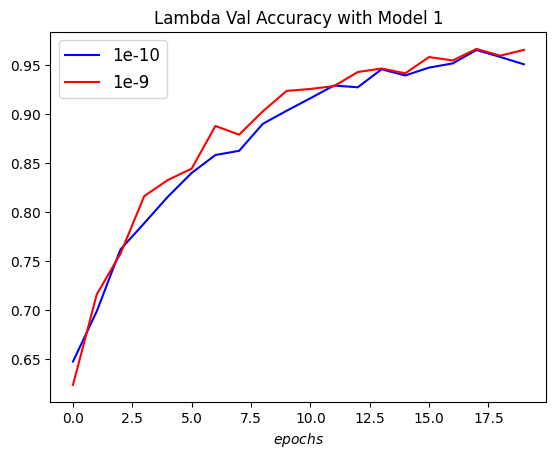

In [7]:
f, ax=plt.subplots()
ax.title.set_text("Lambda Val Accuracy with Model 1")
ax.plot(model1valAcc, label="1e-10", color='b')
ax.plot(model1avalAcc, label="1e-9", color='r')
#ax.plot(model1bvalAcc, label="1e-8", color='y')
#ax.plot(model1cvalAcc, label="1e-7", color='c')
#ax.plot(model1dvalAcc, label="1e-6", color='m')
ax.set_xlabel("$epochs$")
ax.legend(fontsize=12)

# SVMs

### Original model for comparison (gamma = scale)

In [8]:
clf=svm.SVC(kernel='rbf', C=10e-13)
clf.fit(S_in, S_inY)
gtest=clf.predict(S_val)
sv=clf.support_vectors_

tt=np.linspace(-2,2)

q=3
Ytt=3.7*(tt+2)**q/(1+(tt+2)**q)-2

[SVs, _] = sv.shape;
Eout=np.mean(S_valY!=gtest)
print("Eout         : %.1f"% (Eout*100), "%")
print("SV  estimate : %.1f"%(np.sum(clf.n_support_)*100/(N-1)), "%")
print("Number of support vectors:", SVs)

Eout         : 67.9 %
SV  estimate : 100.0 %
Number of support vectors: 50000


### Same as original but with auto gamma

In [9]:
clf=svm.SVC(kernel='rbf', C=10e-13, gamma = 'auto')
clf.fit(S_in, S_inY)
gtest=clf.predict(S_val)
sv=clf.support_vectors_

tt=np.linspace(-2,2)

q=3
Ytt=3.7*(tt+2)**q/(1+(tt+2)**q)-2

[SVs, _] = sv.shape;
Eout=np.mean(S_valY!=gtest)
print("Eout         : %.1f"% (Eout*100), "%")
print("SV  estimate : %.1f"%(np.sum(clf.n_support_)*100/(N-1)), "%")
print("Number of support vectors:", SVs)

Eout         : 67.9 %
SV  estimate : 100.0 %
Number of support vectors: 50000


### Same as original but with gamma = 1

In [10]:
clf=svm.SVC(kernel='rbf', C=10e-13, gamma = 1)
clf.fit(S_in, S_inY)
gtest=clf.predict(S_val)
sv=clf.support_vectors_

tt=np.linspace(-2,2)

q=3
Ytt=3.7*(tt+2)**q/(1+(tt+2)**q)-2

[SVs, _] = sv.shape;
Eout=np.mean(S_valY!=gtest)
print("Eout         : %.1f"% (Eout*100), "%")
print("SV  estimate : %.1f"%(np.sum(clf.n_support_)*100/(N-1)), "%")
print("Number of support vectors:", SVs)

Eout         : 0.0 %
SV  estimate : 100.0 %
Number of support vectors: 50000


In [11]:
clf=svm.SVC(kernel='rbf', C=10e-9, gamma = 5)
clf.fit(S_in, S_inY)
gtest=clf.predict(S_val)
sv=clf.support_vectors_

tt=np.linspace(-2,2)

q=3
Ytt=3.7*(tt+2)**q/(1+(tt+2)**q)-2

[SVs, _] = sv.shape;
Eout=np.mean(S_valY!=gtest)
print("Eout         : %.1f"% (Eout*100), "%")
print("SV  estimate : %.1f"%(np.sum(clf.n_support_)*100/(N-1)), "%")
print("Number of support vectors:", SVs)

Eout         : 0.0 %
SV  estimate : 100.0 %
Number of support vectors: 50000


In [12]:
clf=svm.SVC(kernel='rbf', C=10e-9, gamma = 7.5)
clf.fit(S_in, S_inY)
gtest=clf.predict(S_val)
sv=clf.support_vectors_

tt=np.linspace(-2,2)

q=3
Ytt=3.7*(tt+2)**q/(1+(tt+2)**q)-2

[SVs, _] = sv.shape;
Eout=np.mean(S_valY!=gtest)
print("Eout         : %.1f"% (Eout*100), "%")
print("SV  estimate : %.1f"%(np.sum(clf.n_support_)*100/(N-1)), "%")
print("Number of support vectors:", SVs)

Eout         : 0.0 %
SV  estimate : 100.0 %
Number of support vectors: 50000


In [13]:
clf=svm.SVC(kernel='rbf', C=1, gamma = 'auto')
clf.fit(S_in, S_inY)
gtest=clf.predict(S_val)
sv=clf.support_vectors_

tt=np.linspace(-2,2)

q=3
Ytt=3.7*(tt+2)**q/(1+(tt+2)**q)-2

[SVs, _] = sv.shape;
Eout=np.mean(S_valY!=gtest)
print("Eout         : %.1f"% (Eout*100), "%")
print("SV  estimate : %.1f"%(np.sum(clf.n_support_)*100/(N-1)), "%")
print("Number of support vectors:", SVs)

Eout         : 27.8 %
SV  estimate : 88.8 %
Number of support vectors: 44387
